<a href="https://colab.research.google.com/github/Avnish3909/Google-Stock-price-prediction-RNN/blob/main/Google_Stock_price_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3363,2023-12-02,38689.277344,39678.937500,38652.593750,39476.332031,39476.332031,15534035612
3364,2023-12-03,39472.207031,40135.605469,39298.164063,39978.390625,39978.390625,15769696322
3365,2023-12-04,39978.628906,42371.750000,39978.628906,41980.097656,41980.097656,39856129827
3366,2023-12-05,41986.265625,44408.664063,41421.148438,44080.648438,44080.648438,36312154535
3367,2023-12-06,44080.023438,44256.875000,43478.082031,43986.390625,43986.390625,42075705344


In [3]:
data_training = data[data['Date']<'2021-01-01'].copy()
data_test = data[data['Date']>='2021-01-01'].copy()

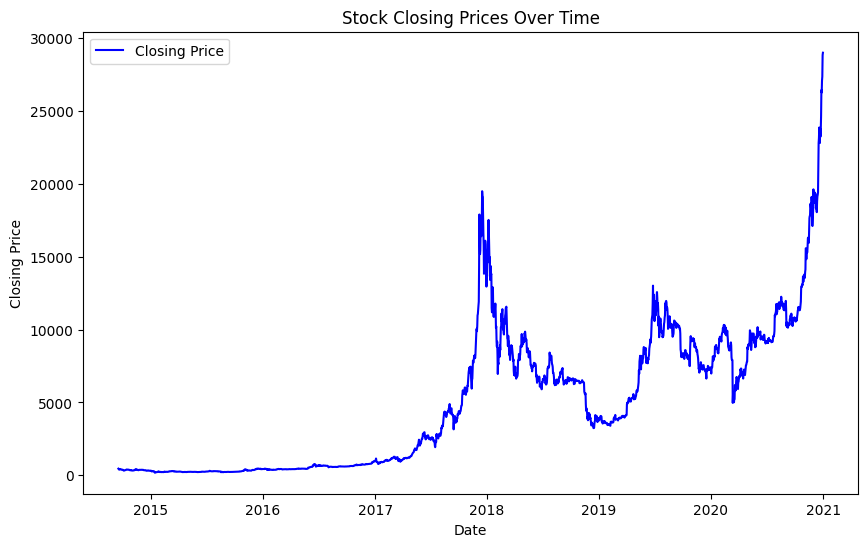

In [4]:
data_training['Date'] = pd.to_datetime(data_training['Date'])

plt.figure(figsize=(10, 6))
plt.plot(data_training['Date'], data_training['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

In [5]:
data_training_1 = data_training.drop(['Adj Close'], axis = 1)

In [6]:
scaler = MinMaxScaler()

columns_to_scale = ['Open', 'High', 'Low', 'Close','Volume']
data_training = data_training_1.copy()

data_training[columns_to_scale] = scaler.fit_transform(data_training[columns_to_scale])


In [7]:
sequence_length = 60

X_train = []
y_train = []

for i in range(sequence_length, len(data_training)):
    X_train.append(data_training[columns_to_scale].iloc[i - sequence_length:i])
    y_train.append(data_training['Open'].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)


In [8]:
X_train.shape

(2238, 60, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [12]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
70/70 [==============================] - 21s 201ms/step - loss: 0.0077
Epoch 2/50
70/70 [==============================] - 14s 200ms/step - loss: 0.0017
Epoch 3/50
70/70 [==============================] - 14s 199ms/step - loss: 0.0020
Epoch 4/50
70/70 [==============================] - 13s 191ms/step - loss: 0.0017
Epoch 5/50
70/70 [==============================] - 13s 188ms/step - loss: 0.0015
Epoch 6/50
70/70 [==============================] - 13s 188ms/step - loss: 0.0019
Epoch 7/50
70/70 [==============================] - 14s 196ms/step - loss: 0.0013
Epoch 8/50
70/70 [==============================] - 14s 201ms/step - loss: 0.0014
Epoch 9/50
70/70 [==============================] - 14s 201ms/step - loss: 0.0012
Epoch 10/50
70/70 [==============================] - 14s 201ms/step - loss: 0.0010
Epoch 11/50
70/70 [==============================] - 14s 200ms/step - loss: 9.8664e-04
Epoch 12/50
70/70 [==============================] - 14s 200ms/step - loss: 0.0010
Epoch 13/

In [13]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [14]:
past_60_days = data_test.tail(60)

In [15]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Adj Close'], axis = 1)
df.head()

<ipython-input-15-8e7daeee352d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index = True)


,Date,Open,High,Low,Close,Volume
0,2023-10-08,27971.677734,28102.169922,27740.662109,27935.089844,7916875290
1,2023-10-09,27934.472656,27989.470703,27302.562500,27583.677734,12007668568
2,2023-10-10,27589.201172,27715.847656,27301.654297,27391.019531,9973350678
3,2023-10-11,27392.076172,27474.115234,26561.099609,26873.320313,13648094333
4,2023-10-12,26873.292969,26921.439453,26558.320313,26756.798828,9392909295


In [16]:
scaler = MinMaxScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Close','Volume']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
X_test = []
y_test = []

for i in range(60, df.shape[0]):
    X_test.append(df.iloc[i-60:i, 1:])
    y_test.append(df.iloc[i, 1])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1070, 60, 5), (1070,))

In [18]:
y_pred = regressor.predict(X_test)

34/34 [==============================] - 2s 53ms/step


In [19]:
y_test

array([0.25521275, 0.26260051, 0.31577975, ..., 0.46740444, 0.50618628,
       0.54663175])

In [20]:
print(scaler.scale_)

[1.93171639e-05 1.90343577e-05 1.96916230e-05 1.93126460e-05
 2.89321071e-12]


In [21]:
scale = 1/1.93171639e-05
scale

51767.43362414604

In [22]:
y_pred = y_pred*scale
y_test = y_test*scale

In [23]:
y_test

array([13211.70899269, 13594.15430492, 16347.10743152, ...,
       24196.32813909, 26203.96485926, 28297.72267348])

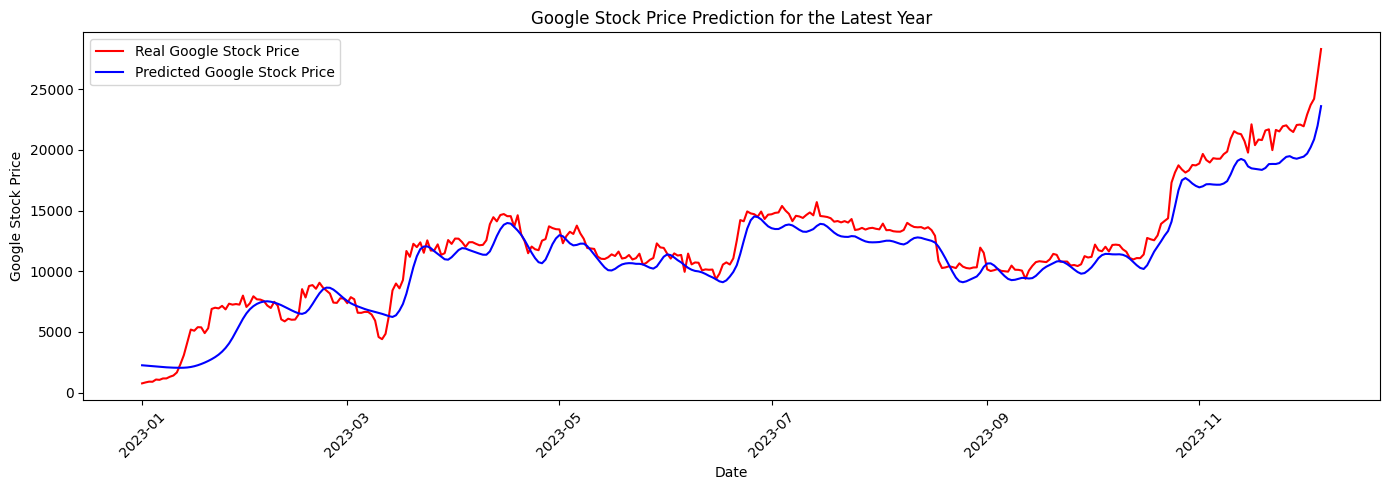

In [24]:
data_test['Date'] = pd.to_datetime(data_test['Date'])
latest_year_data = data_test[data_test['Date'].dt.year == data_test['Date'].dt.year.max()]

plt.figure(figsize=(14, 5))
plt.plot(latest_year_data['Date'], y_test[-len(latest_year_data):], color='red', label='Real Google Stock Price')
plt.plot(latest_year_data['Date'], y_pred[-len(latest_year_data):], color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction for the Latest Year')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:

last_30_days = df[-30:][columns_to_scale].values

scaled_last_30_days = scaler.transform(last_30_days)

X_test_next_month = []

X_test_next_month.append(scaled_last_30_days)


X_test_next_month = np.array(X_test_next_month)

predicted_next_month = regressor.predict(X_test_next_month)
scale_factors = scaler.scale_

predicted_next_month_original_scale = predicted_next_month * scale_factors[:len(columns_to_scale)]


last_date = pd.to_datetime(df.index[-1])
next_month_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

print(predicted_next_month_original_scale)
print(next_month_dates)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 197ms/step
[[-5.10753481e-07 -5.03275972e-07 -5.20654329e-07 -5.10634024e-07
  -7.64976394e-14]]
DatetimeIndex(['1970-01-02 00:00:00.000001129',
               '1970-01-03 00:00:00.000001129',
               '1970-01-04 00:00:00.000001129',
               '1970-01-05 00:00:00.000001129',
               '1970-01-06 00:00:00.000001129',
               '1970-01-07 00:00:00.000001129',
               '1970-01-08 00:00:00.000001129',
               '1970-01-09 00:00:00.000001129',
               '1970-01-10 00:00:00.000001129',
               '1970-01-11 00:00:00.000001129',
               '1970-01-12 00:00:00.000001129',
               '1970-01-13 00:00:00.000001129',
               '1970-01-14 00:00:00.000001129',
               '1970-01-15 00:00:00.000001129',
               '1970-01-16 00:00:00.000001129',
               '1970-01-17 00:00:00.000001129',
               '1970-01-18 00:00:00.000001129',
               '1970-01-19 00:00:00.000001129

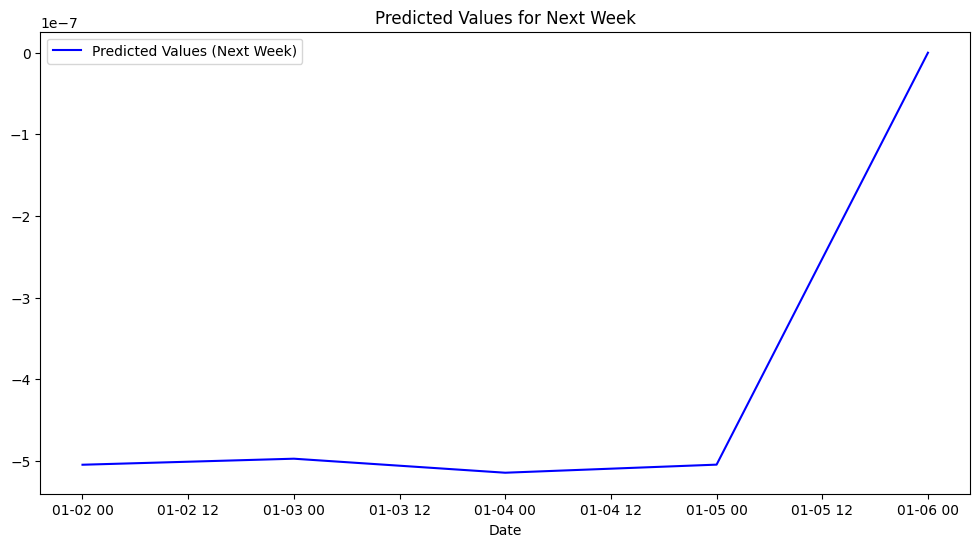

In [40]:
predicted_reshaped = predicted_next_week_original_scale.reshape(-1)
plt.figure(figsize=(12, 6))
plt.plot(next_week_dates, predicted_reshaped, color='blue', label='Predicted Values (Next Week)')
plt.title('Predicted Values for Next Week')
plt.xlabel('Date')
plt.legend()
plt.show()


In [ ]:
predicted_next_week_original_scale.shape

In [ ]:
print(last_month_dates.shape)
print(scaled_predicted_values_last_month.shape)